In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras 
import tensorflow.keras
from tensorflow.keras.utils import plot_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout




In [32]:
(X_train, y_train), (X_test, y_test)=keras.datasets.fashion_mnist.load_data()

In [33]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [34]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [35]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [36]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [37]:
y_train[0]

9

In [38]:
class_labels = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle Boot']


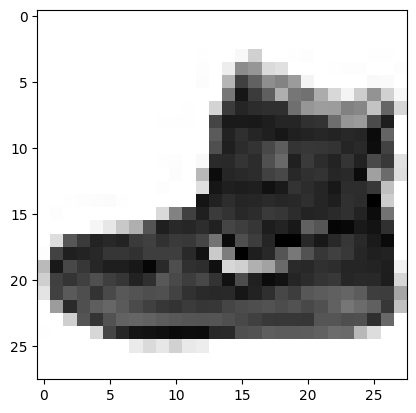

In [39]:
plt.imshow(X_train[0], cmap='Greys')

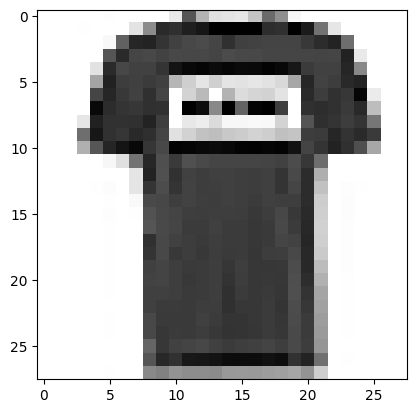

In [40]:
plt.imshow(X_train[1], cmap='Greys')

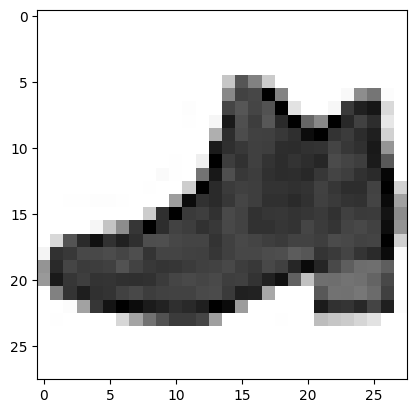

In [41]:
plt.imshow(X_train[15], cmap='Greys')

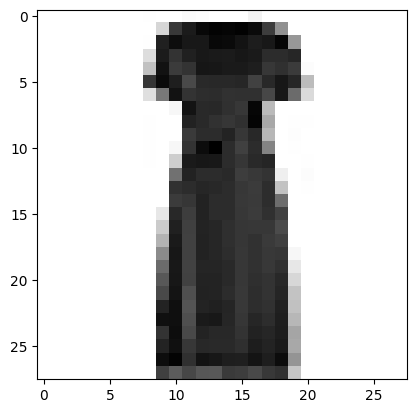

In [42]:
plt.imshow(X_train[50], cmap='Greys')

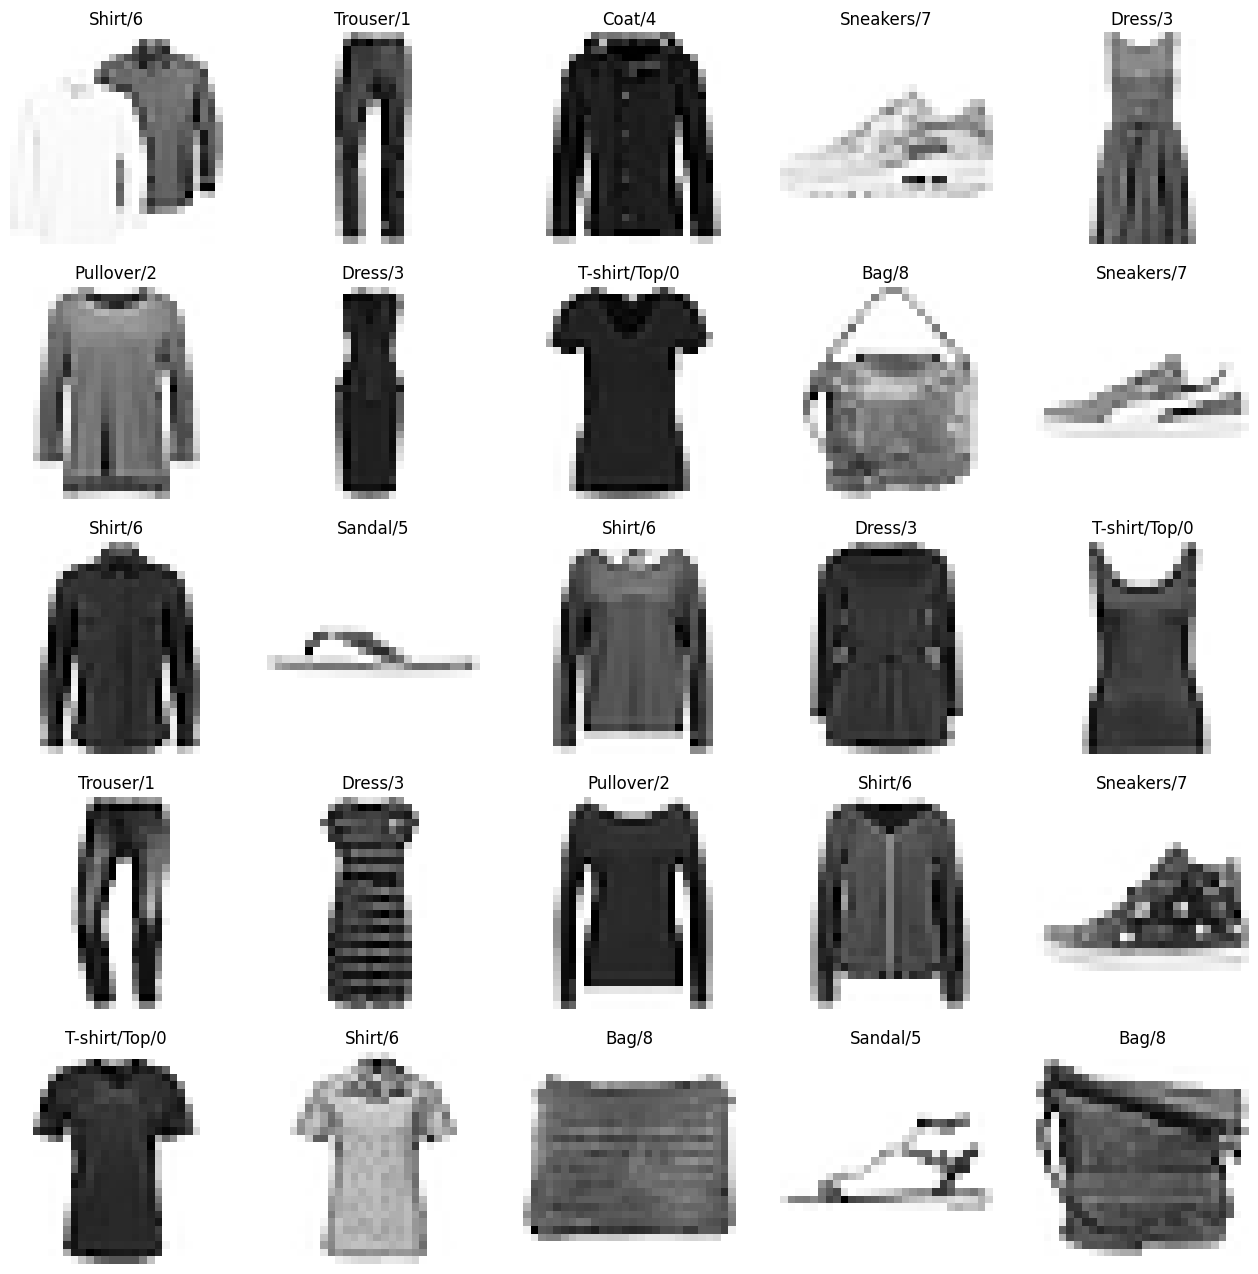

In [43]:
plt.figure(figsize=(16, 16))
j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j)
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis('off')
    plt.title('{}/{}'.format(class_labels[y_train[i]], y_train[i]))
    j += 1


[9 0 3 2 7 5 1 6 4 8]
[9 0 3 2 7 5 1 6 4 8]
[0, 0]
[0, 0, 1]
[0, 0, 1, 3]
[0, 0, 1, 3, 5]
[0, 0, 1, 3, 5, 6]
[0, 0, 1, 3, 5, 6, 8]
[0, 0, 1, 3, 5, 6, 8, 16]
[0, 0, 1, 3, 5, 6, 8, 16, 18]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23]
[9 0 3 2 7 5 1 6 4 8]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0, 1]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0, 1, 3]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0, 1, 3, 5]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0, 1, 3, 5, 6]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0, 1, 3, 5, 6, 8]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0, 1, 3, 5, 6, 8, 16]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0, 1, 3, 5, 6, 8, 16, 18]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0, 1, 3, 5, 6, 8, 16, 18, 19]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23]
[9 0 3 2 7 5 1 6 4 8]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 3, 0]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 1

/var/folders/5q/xycqttws0ll8pjcw509y6tmh0000gp/T/ipykernel_18291/924469132.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(24, 24))


[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 3, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 5, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 6, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 8, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 16, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 18, 0, 1, 3]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 3, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 5, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 6, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 8, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 16, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 18, 0, 1, 3, 5]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 3, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 5, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 6, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 8, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 16, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 18, 0, 1, 3, 5, 6]
[0, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 1, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 3, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 5, 0, 1, 3, 5, 6, 8, 16, 18, 19, 23, 6, 0, 1, 3, 5, 6, 8,

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

<Figure size 2400x2400 with 0 Axes>

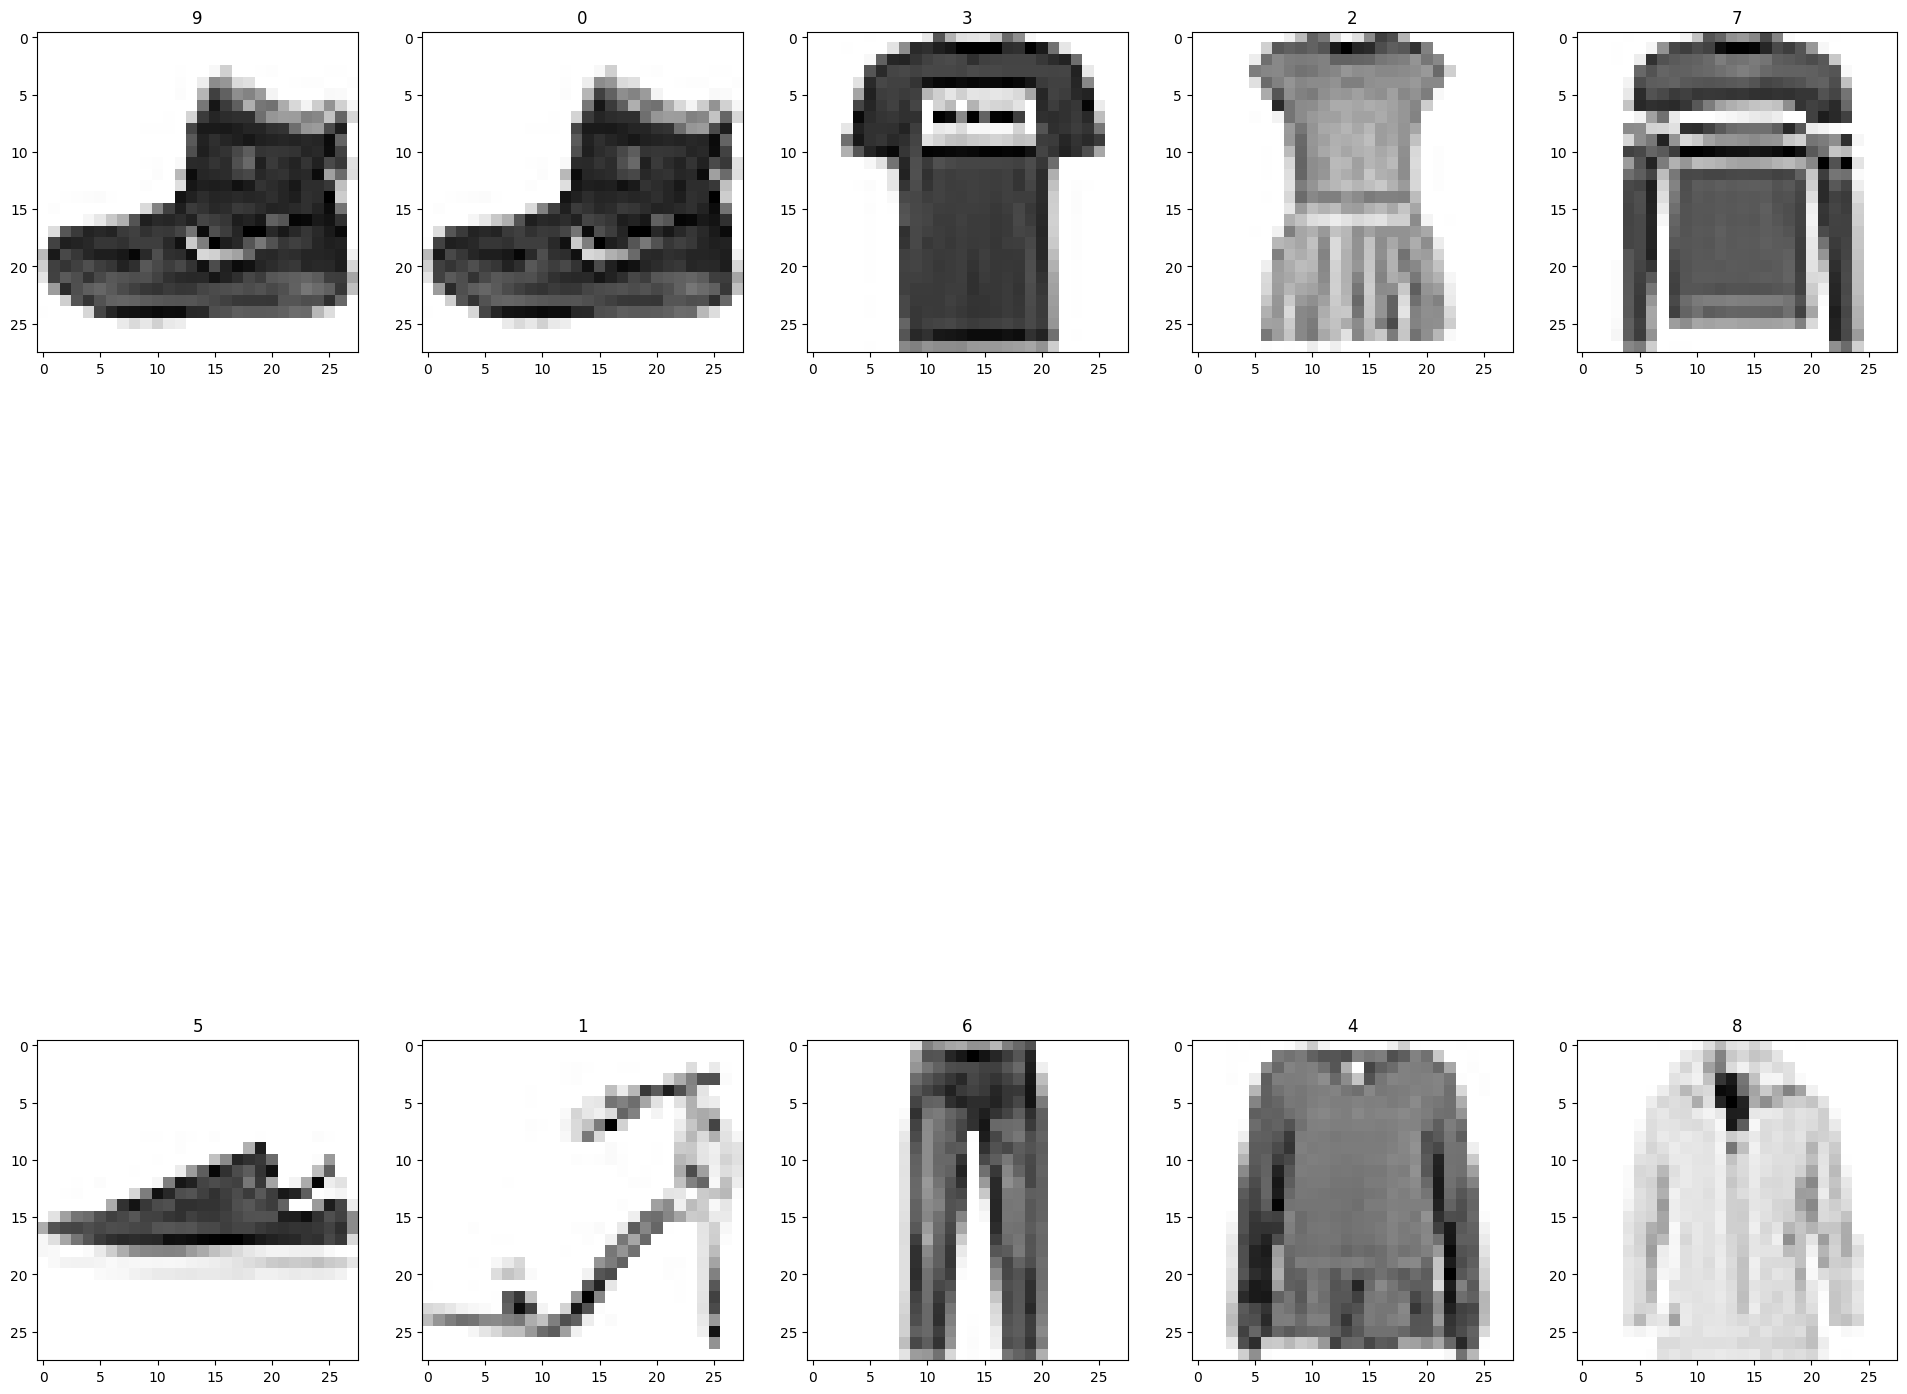

In [44]:
fashionMNIST=keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashionMNIST.load_data()
x_train 
np.expand_dims(x_train, -1)
x_test=np.expand_dims(x_test, -1)
ei1=np.array(pd.unique(y_train))
eindex1=[]
print(ei1)
for i in ei1:
    eindex1.append(list(y_train).index(i))
    print(ei1)
    for i in ei1:
        eindex1.append(list(y_train).index(i))
        print(eindex1)
        plt.figure(figsize=(24, 24))
for x, y in enumerate(eindex1):
    if x < len(ei1):  # Ensure x is within the bounds of ei1
        plt.subplot(2, 5, x + 1)
        plt.imshow(x_train[y], cmap='Greys')
        plt.title('{}'.format(ei1[x]))


In [45]:
X_train.ndim

3

In [46]:
X_train.shape

(60000, 28, 28)

In [47]:
X_train=np.expand_dims(X_train, -1)
X_test=np.expand_dims(X_test, -1)


In [48]:
X_train.ndim

4

In [49]:
X_train.shape

(60000, 28, 28, 1)

Feature scaling-normalize range of the independent variables used in data pre processing

In [50]:
X_train=X_train/255
X_test=X_test/255

In [51]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [52]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=101)



In [54]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [55]:
X_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

Creating CNN Model

In [57]:
height = 128
width = 128
channels = 3

num_classes = 10



model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='same', input_shape=(height, width, channels)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1,1), padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(units=num_classes, activation='softmax')
])
      